In [28]:
#!/usr/bin/env python
# -*- encoding: utf-8 -*-
'''
@filename              :learnMl.ipynb
@createFileTime        :2022/12/01 15:55:25
@author                :THEIIKU
@version               :1.0
@description           :
Created in JLU SENSORLAB
'''




import tensorflow as tf
import pandas as pd

dataset_div  ='/home/star/Documents/datasetMl'
dataset_name ='housing.csv'

def loaddataset (div = dataset_div ,name =  dataset_name):
    print("loading ",dataset_name)
    return(pd.read_csv(dataset_div + '/' + dataset_name))


In [29]:
housing = loaddataset()
housing.head()
#显示表头

loading  housing.csv


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


array([[<AxesSubplot: title={'center': 'longitude'}>,
        <AxesSubplot: title={'center': 'latitude'}>,
        <AxesSubplot: title={'center': 'housing_median_age'}>],
       [<AxesSubplot: title={'center': 'total_rooms'}>,
        <AxesSubplot: title={'center': 'total_bedrooms'}>,
        <AxesSubplot: title={'center': 'population'}>],
       [<AxesSubplot: title={'center': 'households'}>,
        <AxesSubplot: title={'center': 'median_income'}>,
        <AxesSubplot: title={'center': 'median_house_value'}>]],
      dtype=object)

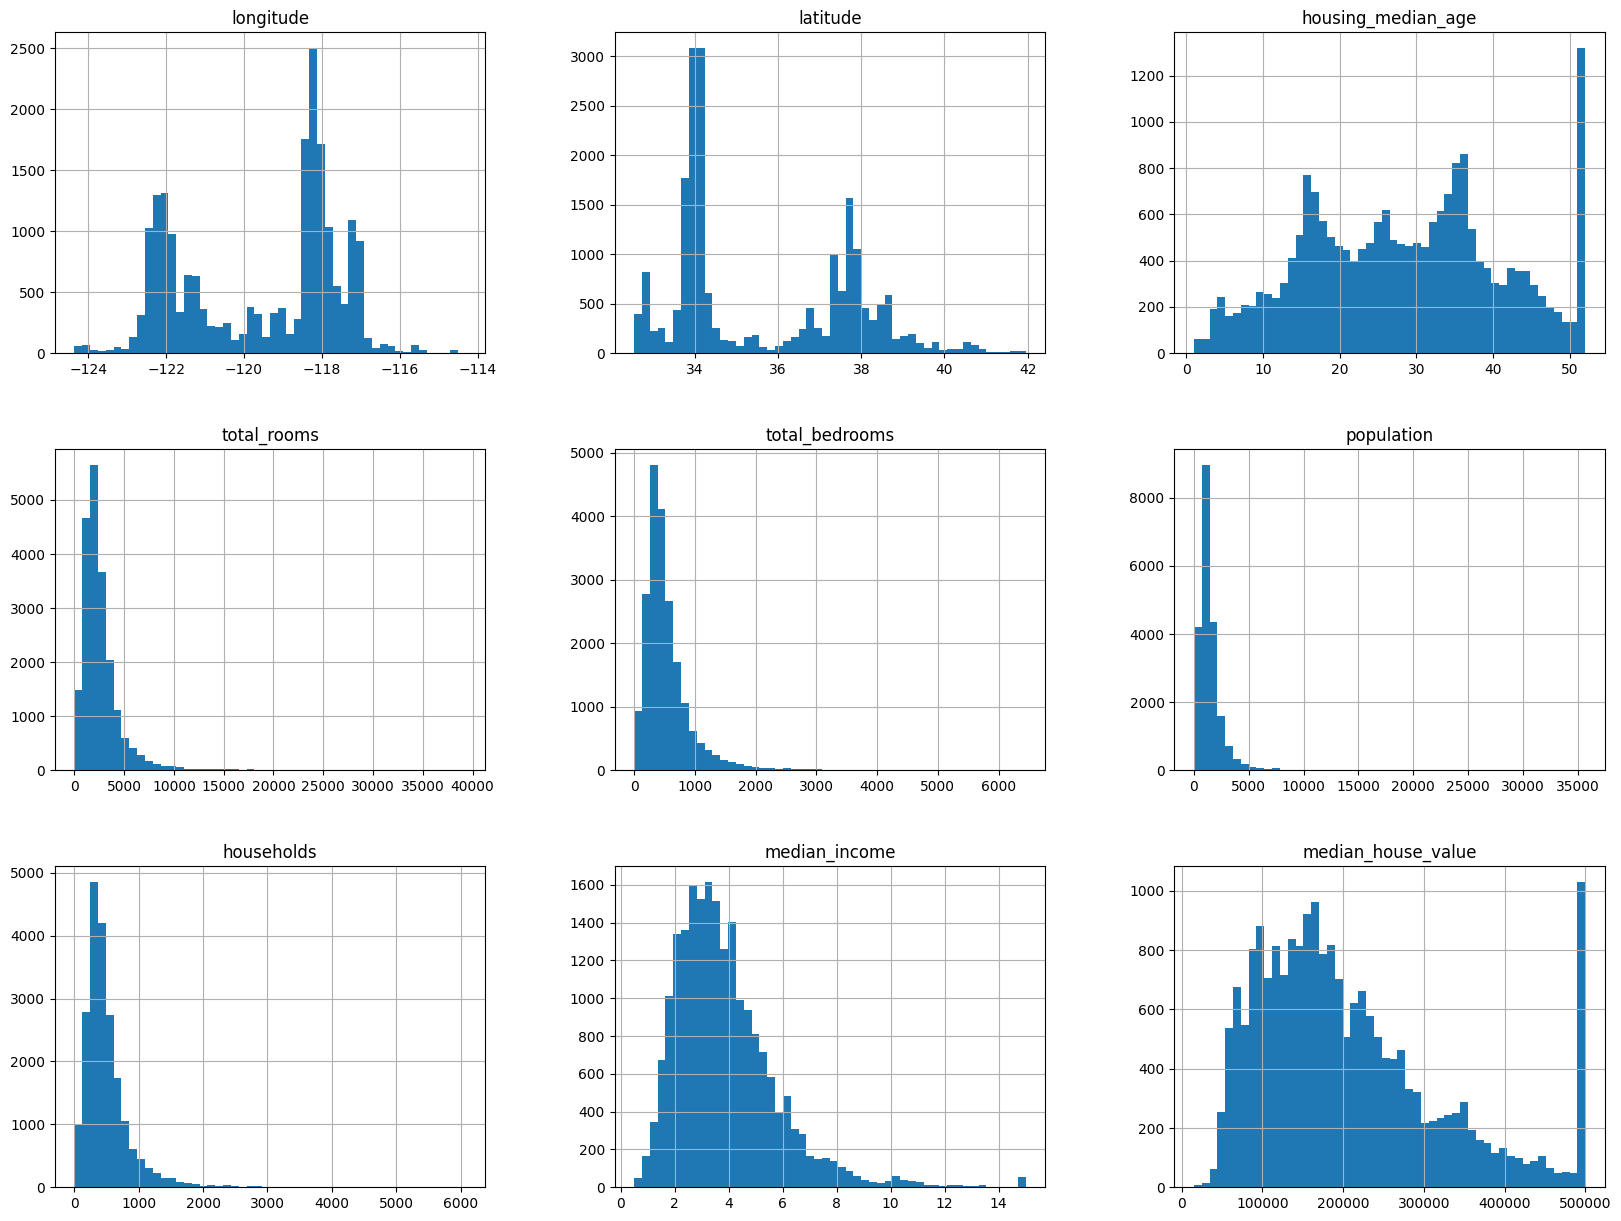

In [30]:
import matplotlib.pyplot as plt
housing.hist(bins= 50,figsize=(20,15))
#显示直方图，数据概览


<AxesSubplot: >

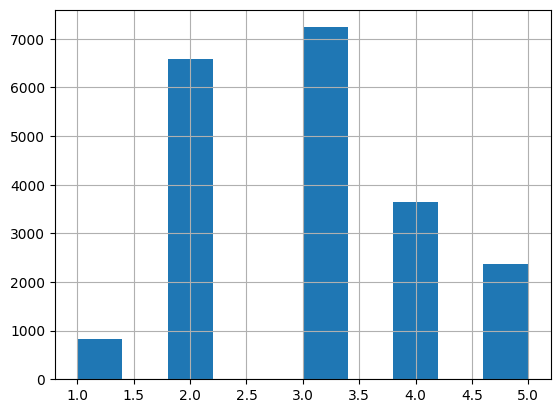

In [31]:
import numpy as np

test_ratio = 0.3
"""
def spilt_train_test(data , ratio = test_ratio):#数据分割，默认0.3分割率,返回两个数据集
    shuffled_indices  = np.random.permutation(len(data))
    #打乱数据集
    test_size       = int(len(data)* test_ratio)
    test_indices    = shuffled_indices[:test_size] 
    train_indices   = shuffled_indices[test_size:]
    #分割数据集为两部分，测试和训练
    return data.iloc[test_indices] , data.iloc[train_indices]
    #iloc[:,:]取行列函数，左行右列
    """
import sklearn 
from sklearn.model_selection import train_test_split

train_set , test_set = train_test_split(housing ,test_size = test_ratio, random_state= 42)
#random_state 是分层抽样的参数，按照比例抽取数据
housing["income_cat"] = pd.cut(housing["median_income"],
                               bins=[0, 1.5 , 3 , 4.5 , 6 , np.inf],#将一维数组分段，分割成不同闭区间
                               labels= [ 1 , 2 , 3 , 4, 5],#输出内容的标签
                               )
#housing 返回的内容是序号与label对应的数值
#在housing后面加一列income_cat属性
housing["income_cat"].hist()


In [32]:
from sklearn.model_selection import StratifiedShuffleSplit
#导入分层抽样函数
test_ratio  = 0.3
#测试集占比
random_seed = 40
#随机数种子
split = StratifiedShuffleSplit(n_splits= 1 , test_size = test_ratio , random_state= random_seed)
#定义一个分类法
#n_splits       分离出的训练集和测试集的数量，默认为10
#test_size      测试集占比
#random_state   随机数种子
for train_index , test_index in split.split(housing , housing["income_cat"]):
    #连同新加入的属性一起分割
    start_train_set   = housing.loc[train_index]
    start_test_set    = housing.loc[test_index]
start_test_set["income_cat"].value_counts()/len(start_test_set)

3    0.350614
2    0.318798
4    0.176357
5    0.114341
1    0.039890
Name: income_cat, dtype: float64

In [33]:
for set_ in (start_test_set , start_train_set):
    set_.drop("income_cat" , axis=1 , inplace= True) 
    #删除“incomecat”，还原数据集`

<AxesSubplot: xlabel='longitude', ylabel='latitude'>

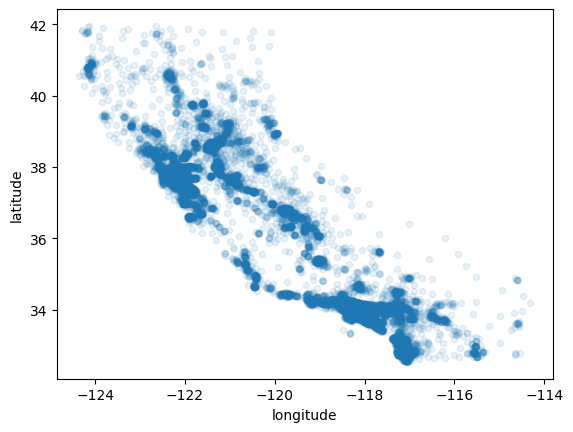

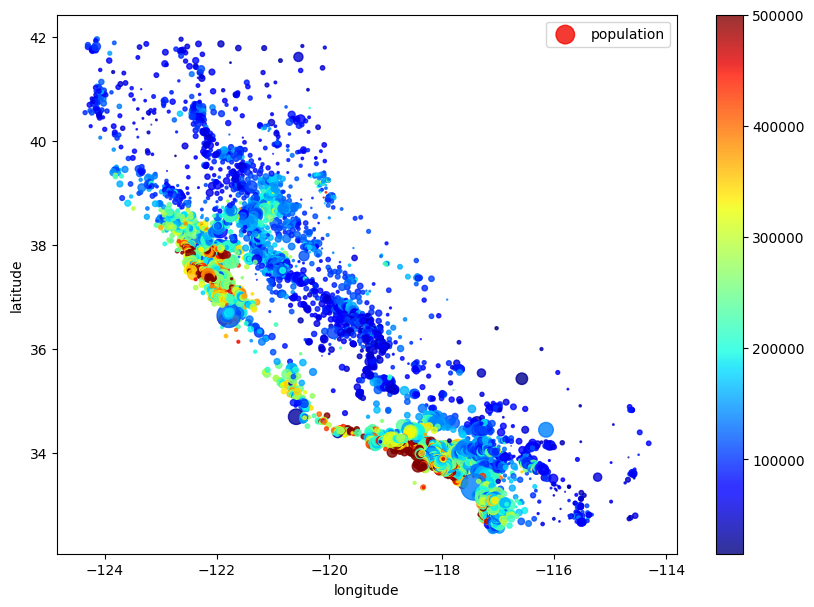

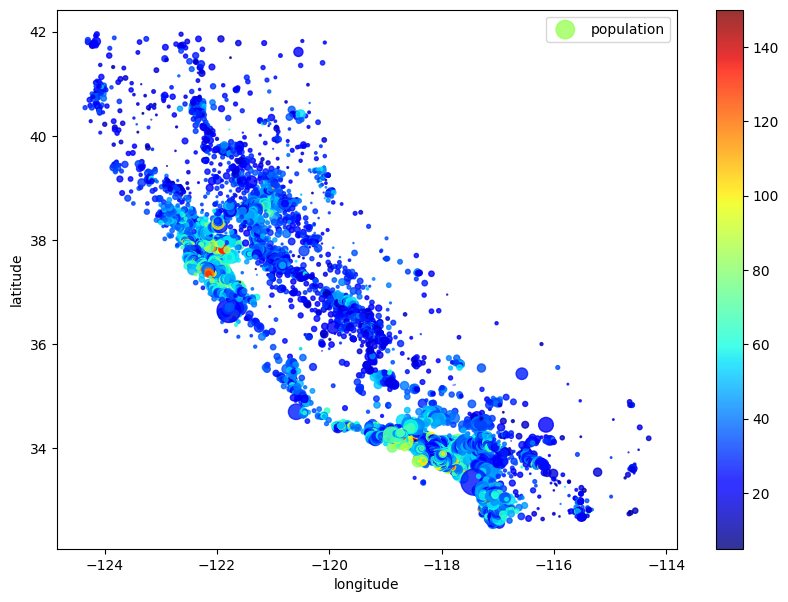

In [34]:
#绘制散点图

housing.plot(kind = "scatter", x = "longitude", y = "latitude", alpha = 0.1)
#绘制housing里的元素
#kind   绘制图像种类
#x      x轴取值
#y      y轴取值
#alpha  显示密度
housing.plot(kind = "scatter", x = "longitude", y = "latitude", alpha = 0.8,#确定点的位置和深浅
               s = housing["population"]/100 ,label = "population" ,figsize= (10,7),#通过人口数量确定点的大小
               c = housing["median_house_value"], cmap = plt.get_cmap("jet"),colorbar= True )#通过房价确定颜色

housing.plot(kind = "scatter", x = "longitude", y = "latitude", alpha = 0.8,#确定点的位置和深浅
               s = housing["population"]/100 ,label = "population" ,figsize= (10,7),#通过人口数量确定点的大小
               c = housing["median_income"]*10, cmap = plt.get_cmap("jet"),colorbar= True )#通过收入确定颜色

#s                          点的大小判断依据
#figsize(,)                 点大小的范围
#cmap = plt.get_cmap("jet") 上色方式
#colorbar                   显示颜色图谱


In [35]:
print(housing)

       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.23     37.88                41.0        880.0           129.0   
1        -122.22     37.86                21.0       7099.0          1106.0   
2        -122.24     37.85                52.0       1467.0           190.0   
3        -122.25     37.85                52.0       1274.0           235.0   
4        -122.25     37.85                52.0       1627.0           280.0   
...          ...       ...                 ...          ...             ...   
20635    -121.09     39.48                25.0       1665.0           374.0   
20636    -121.21     39.49                18.0        697.0           150.0   
20637    -121.22     39.43                17.0       2254.0           485.0   
20638    -121.32     39.43                18.0       1860.0           409.0   
20639    -121.24     39.37                16.0       2785.0           616.0   

       population  households  median_income  media

In [36]:
#寻找相关性

corr_mattrix = housing.corr()
corr_mattrix["median_house_value"].sort_values(ascending = False)
#检测相关性，越接近1越相关

/tmp/ipykernel_3650/676405600.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_mattrix = housing.corr()


median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

<AxesSubplot: xlabel='median_income', ylabel='median_house_value'>

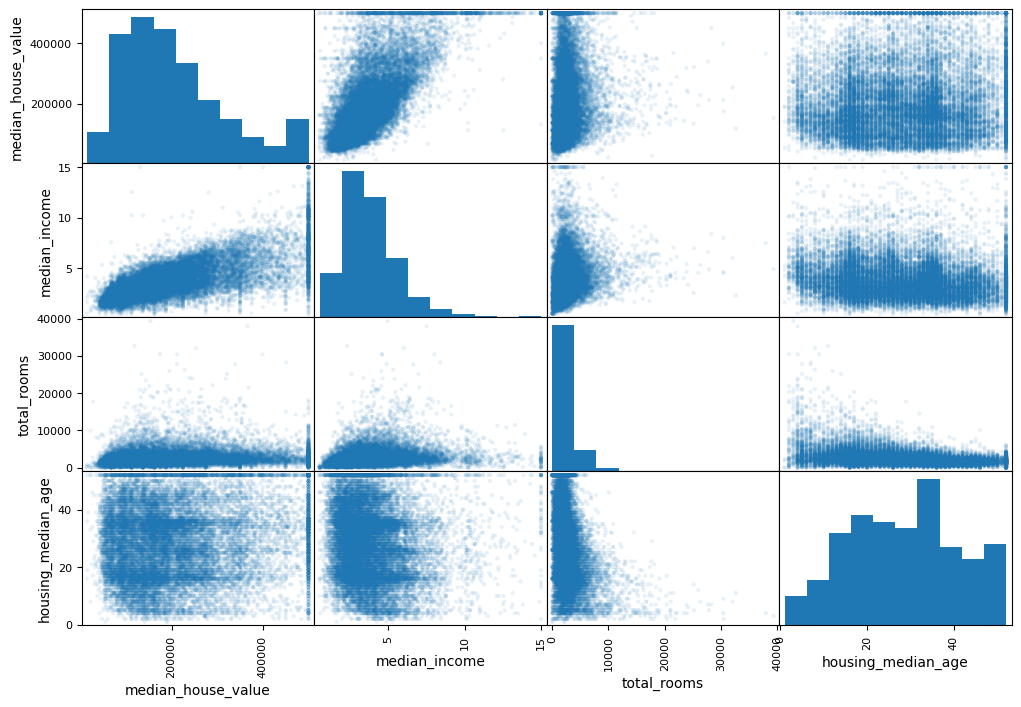

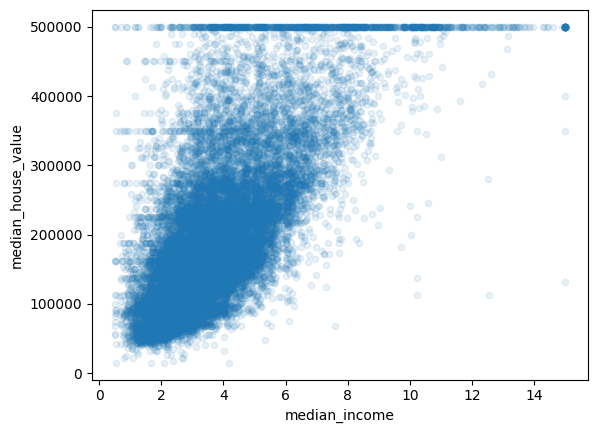

In [37]:
from pandas.plotting import scatter_matrix

attributes = ["median_house_value" , "median_income" , "total_rooms" , "housing_median_age"]
scatter_matrix(housing[attributes],figsize=(12,8),alpha=0.1)
#统计各数据间的关系
housing.plot(kind="scatter" , x="median_income" , y = "median_house_value" , alpha = 0.1)

In [38]:

housing         = start_train_set.drop("median_house_value" , axis = 1)
housing_labels  = start_train_set["median_house_value"].copy()
#将输入与输出分开，分成housing 和 housing_label 两个部分（用于训练）
'''
housing.dropna(subset = ["total_bedrooms"])
#删除空值
housing.drop("total_bedrooms",axis = 1 )
#删除属性

median = housing["total_bedrooms"].median()
housing["total_bedrooms"].fillna(median, inplace = True)
#中位数替代空值
'''


'\nhousing.dropna(subset = ["total_bedrooms"])\n#删除空值\nhousing.drop("total_bedrooms",axis = 1 )\n#删除属性\n\nmedian = housing["total_bedrooms"].median()\nhousing["total_bedrooms"].fillna(median, inplace = True)\n#中位数替代空值\n'

In [39]:
#使用sklearn清理数据
from sklearn.impute import SimpleImputer

imputer     = SimpleImputer(strategy= "median" )
#创建一个实例，向空值里填充中位数
housing_num = housing.drop("ocean_proximity",axis=1)
#清理数据之前创建一个去除文字变量的副本
imputer.fit(housing_num)
#imputer.statistics_
X = imputer.transform(housing_num)
#X返回的是一个numpy数组
hosuing_tr = pd.DataFrame(X , columns= housing_num.columns, index = housing_num.index)
#将numpy数组转换为DataFrame，便于操作




In [40]:
#处理文本属性的数据
from sklearn.preprocessing import OrdinalEncoder
housing_cat = housing[["ocean_proximity"]]
#文本转编码必须是二维数组
housing_cat.head(10)
ordinal_encoder = OrdinalEncoder()
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)
housing_cat_encoded[:10]
#显示前十个数据

array([[3.],
       [0.],
       [3.],
       [1.],
       [3.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.]])

In [41]:
#文本转换成哑变量
from sklearn.preprocessing import OneHotEncoder
onehot_encoedr = OneHotEncoder()
#哑变量实例
housing_cat_onehot = onehot_encoedr.fit_transform(housing_cat)
housing_cat_onehot
#返回的是Scipy的稀疏矩阵
housing_cat_onehot.toarray()
#转换为Numpy数据
onehot_encoedr.categories_
#显示被编码的元素


[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [42]:
#自定义转换器
from sklearn.base import BaseEstimator, TransformerMixin

rooms_ix , bedrooms_ix , population_ix , households_ix = 3, 4, 5 ,6 

class CombinedAttributesAdder(BaseEstimator , TransformerMixin):
    def __init__(self, add_bedrooms_per_room = True):
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self , X, y=None):
        return self
    def transform(self , X):
        rooms_per_household         = X[:,rooms_ix] / X[:,households_ix]
        population_per_household    = X[:,population_ix] / X[:,households_ix]
        if self.add_bedrooms_per_room :
            bedrooms_per_room       = X[:,bedrooms_ix] / X[:,rooms_ix]
            return np.c_[X, rooms_per_household , population_per_household , bedrooms_per_room]
        else :
            return np.c_[X, rooms_per_household , population_per_household ]
            
attr_adder = CombinedAttributesAdder(add_bedrooms_per_room= False)
housing_extra_attiibs = attr_adder.transform(housing.values)

    

In [43]:
#建立一条数据处理流水线

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline    = Pipeline([
    ('imputer'      ,   SimpleImputer(strategy="median")),#转换器1
    ('attribs_adder',   CombinedAttributesAdder()),#转换器2
    ('std_scaler'   ,   StandardScaler()   ),#估算器
])
#StandardScaler 是一种标准化方法 可以使均值为0,方差为1
housing_num_tr = num_pipeline.fit_transform(housing_num)
#fit流水线
housing_num_tr


array([[-1.36196331,  1.05388113,  1.85809756, ..., -0.10157238,
        -0.06204808, -0.1100161 ],
       [ 0.73919488, -0.80186474, -0.84229497, ..., -0.47942323,
         0.05356526,  0.56222647],
       [-1.34199981,  1.03044999, -0.2069085 , ..., -0.94101976,
        -0.28881385,  1.31425327],
       ...,
       [ 0.4796694 , -0.72219888,  0.90501784, ..., -0.21253128,
        -0.13526757, -0.0761796 ],
       [-1.12739221,  1.11480208,  0.03136143, ..., -0.20898495,
        -0.12080062,  0.0634851 ],
       [-0.30888878,  0.45404408, -0.28633181, ...,  0.05983932,
         0.10853818, -0.07836285]])

In [44]:
#列操作流水线
from sklearn.compose import ColumnTransformer

num_attribs = list(housing_num)
print(num_attribs)
#获取housing_num的列
cat_attribs = ["ocean_proximity"]
#手动选择一列
full_pipeline = ColumnTransformer([
    ("num" , num_pipeline  , num_attribs),
    ("cat" , OneHotEncoder() , cat_attribs), ])

housing_prepared    = full_pipeline.fit_transform(housing)
housing_prepared 

['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income']


array([[-1.36196331,  1.05388113,  1.85809756, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.73919488, -0.80186474, -0.84229497, ...,  0.        ,
         0.        ,  0.        ],
       [-1.34199981,  1.03044999, -0.2069085 , ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [ 0.4796694 , -0.72219888,  0.90501784, ...,  0.        ,
         0.        ,  0.        ],
       [-1.12739221,  1.11480208,  0.03136143, ...,  0.        ,
         0.        ,  0.        ],
       [-0.30888878,  0.45404408, -0.28633181, ...,  0.        ,
         0.        ,  0.        ]])

In [45]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(housing_prepared,housing_labels)
#housing_labels 一定要与训练集的大小一致，不然会报错

LinearRegression()

In [52]:
load_data   = housing.iloc[ : 5]
load_labels = housing_labels.iloc[ : 5]
#用前五组数据测试一下
load_data_processed = full_pipeline.transform(load_data) 
load_data_predicted = lin_reg.predict(load_data_processed)
print(load_data_predicted)
print(load_labels)


[207206.78386374 166051.56938731 285740.94558848  71527.1869024
 280327.87620288]
472      150000.0
7780     146900.0
112      255000.0
2744      64400.0
15721    355300.0
Name: median_house_value, dtype: float64


In [57]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

#决策树预测
tree_reg = DecisionTreeRegressor()

tree_reg.fit(housing_prepared,housing_labels)

housing_prediction = tree_reg.predict(housing_prepared)

tree_mse = mean_squared_error(housing_labels , housing_prediction)
#方差检验
tree_rmse = np.sqrt(tree_mse)
tree_rmse
#标准差应该为0

0.0

In [66]:
from sklearn.model_selection import cross_val_score
#交叉验证，防止过拟合影响结果
scores = cross_val_score (tree_reg , housing_prepared , housing_labels , 
                           scoring= "neg_mean_squared_error", cv= 10 )
#需要输入：算法 输入数据 输出对照 评分标准（scoring） 交叉次数（cv）
#score返回的是一个负值
tree_reg_scores = np.sqrt(-scores)
tree_reg_scores

array([73143.75799954, 70932.34717689, 71154.19115798, 72570.92664962,
       72363.17043072, 70497.71762218, 71562.77537719, 71408.04270006,
       72990.0707438 , 69919.00868922])

In [67]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean  :", scores.mean())#均值
    print("Standard deviation:",scores.std())#浮动值
display_scores(tree_reg_scores)

Scores: [73143.75799954 70932.34717689 71154.19115798 72570.92664962
 72363.17043072 70497.71762218 71562.77537719 71408.04270006
 72990.0707438  69919.00868922]
Mean  : 71654.20085471889
Standard deviation: 1026.388478762912
